In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv("/content/Mall_Customers.csv")
print("Dataset Loaded Successfully!")
print("\nFirst 5 rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())

Dataset Loaded Successfully!

First 5 rows:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9

In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

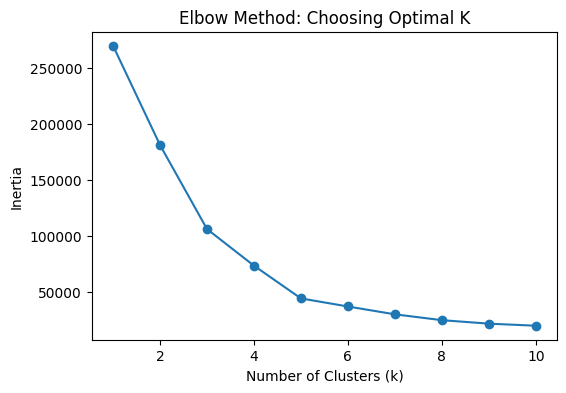

In [7]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method: Choosing Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [9]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

y_kmeans = kmeans.fit_predict(X)

df['Cluster'] = y_kmeans

print("\nCluster Assignment Sample:\n", df[['CustomerID','Cluster']].head())


Cluster Assignment Sample:
    CustomerID  Cluster
0           1        4
1           2        2
2           3        4
3           4        2
4           5        4


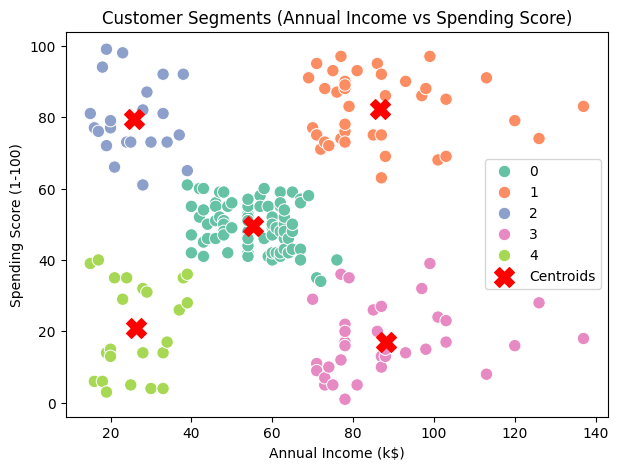

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X[:,0],
    y=X[:,1],
    hue=y_kmeans,
    palette="Set2",
    s=80
)
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s=200,
    c='red',
    marker='X',
    label='Centroids'
)
plt.title("Customer Segments (Annual Income vs Spending Score)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [11]:
sil_score = silhouette_score(X, y_kmeans)
print(f"\n📊 Silhouette Score for k={optimal_k}: {sil_score:.3f}")


📊 Silhouette Score for k=5: 0.554


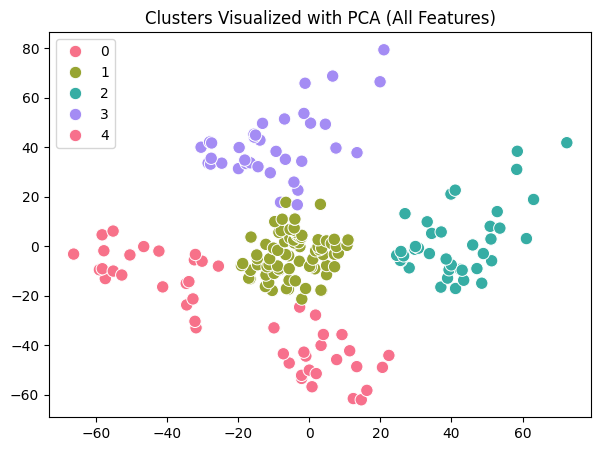

In [12]:
features = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values
kmeans_full = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_full = kmeans_full.fit_predict(features)

pca = PCA(n_components=2)
reduced = pca.fit_transform(features)

plt.figure(figsize=(7,5))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=clusters_full, palette="husl", s=80)
plt.title("Clusters Visualized with PCA (All Features)")
plt.show()